In [19]:
# @credits: https://github.com/vishwamano/Artificial-Neural-Networks--ANN-/blob/main/artificial_neural_network.py

import numpy as np 
import pandas as pd 
import tensorflow as tf 

#check tensorflow version 
tf.__version__ 

#Importing the dataset 
dataset = pd.read_csv('Churn_Modelling.csv') 

#loda the data in variable X, leave the first 3 columns 
X = dataset.iloc[:, 3:-1].values 

#Loda the target data in  variable y 
y = dataset.iloc[:, -1].values 
print(X) 
print(y) 

#Encoding categorical data 
#Label Encoding the "Gender" column 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
X[:, 2] = le.fit_transform(X[:, 2]) 

print(X) 

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]
[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [20]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough') 
X = np.array(ct.fit_transform(X)) 

print(X) 

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [21]:
#Splitting the dataset into the Training set and Test set, 80% for the training and 20% for the testing 
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
#Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 


In [22]:
#Part 2 - Building the ANN 
#Initializing the ANN 
ann = tf.keras.models.Sequential()

#Adding the input layer and the first hidden layer 
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

#Adding the second hidden layer 
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

#Adding the output layer, adding one unit becuase its a binary classification task 
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

In [23]:
#Part 3 - Training the ANN 
#Compiling the ANN 
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training the ANN on the Training set 
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)  

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.8779 - accuracy: 0.4279
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7636
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.8020
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.8111
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.8192
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.8216
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4803 - accuracy: 0.8236
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.8241
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8263
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4465 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8624
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8620
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8610
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8596
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8612
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8621
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8620
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8627
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8610
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 

In [ ]:
#Part 4 - Making the predictions and evaluating the model 
#Predicting the result of a single observation 
#predict if the customer with the following informations will leave the bank: 
""" 
Use this ANN model to predict if the customer with the following informations will leave the bank:  
Geography: France 
Credit Score: 600 
Gender: Male 
Age: 40 years old 
Tenure: 3 years 
Balance: $ 60000 
Number of Products: 2 
Does this customer have a credit card? Yes 
Is this customer an Active Member: Yes 
Estimated Salary: $ 50000 
So, should we say goodbye to that customer? 
Solution: 
""" 

In [24]:
#Predicting the Test set results

y_pred = ann.predict(X_test) 
y_pred = (y_pred > 0.6)
 
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 
     
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5) 

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[False]]


In [ ]:
""" 
Therefore, our ANN model predicts that this customer stays in the bank! 
Important note 1: Notice that the values of the features were all input in a double pair of square brackets. 
That's because the "predict" method always expects a 2D array as the format of its inputs. 
And putting our values into a double pair of square brackets makes the input exactly a 2D array. 
Important note 2: Notice also that the "France" country was not input as a string in the last column 
but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded 
values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". 
And be careful to include these values in the first three columns, because the dummy 
variables are always created in the first columns. 
""" 

In [25]:
#Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print(cm) 
acc = accuracy_score(y_test, y_pred) 
print('Accuracy =', acc) 

[[1540   55]
 [ 214  191]]
Accuracy = 0.8655


In [26]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)


print('Accuracy: ', accuracy_score(y_test, predictions))

y_scores = model.predict_proba(X_test)
print(y_scores)

Predicted labels:  [0 0 0 ... 0 0 0]
Actual labels:     [0 1 0 ... 0 0 0]
Accuracy:  0.811
[[0.79179456 0.20820544]
 [0.6554306  0.3445694 ]
 [0.85522058 0.14477942]
 ...
 [0.79895664 0.20104336]
 [0.87436932 0.12563068]
 [0.7667202  0.2332798 ]]


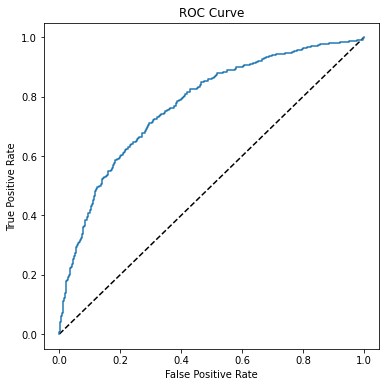

In [27]:
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7721630094043886


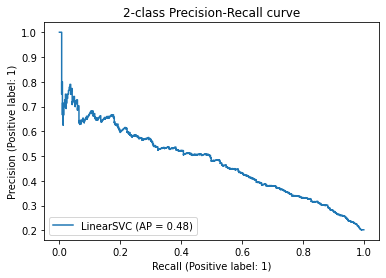

In [33]:
from sklearn.metrics import PrecisionRecallDisplay

y_score = model.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")